# Initalize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

import scipy.stats as stats

from zillow_wrangle import wrangle_zillow

import warnings
warnings.filterwarnings("ignore")
print('Success')

Success


## Wrangle

All the prep/wrangle work is handled by the wrangle_zillow() function imported above. For a broad overview of the wrangle function use help(wrangle_zillow). For a more indpeth overview, see the [README](https://github.com/datastraine/zillow-cluster-project/blob/main/README.md).

In [2]:
help(wrangle_zillow)

Help on function wrangle_zillow in module zillow_wrangle:

wrangle_zillow()
    Loads zillow data and then fliters it where propertylandusetypeid is 260, 261, 262, 263, 264, 265, 268, 275, 276, or 279.
    Drops unnecessary id columns and any duplicated columns.    
    Creates a has_pool column where poolcnt = 1.
    Creates a has_basement column where basementsqft > 0.
    Creates a taxdollar_per_lotsqft  feature.
    Creates taxdollar_per_strcturesqft feature.
    Creates a more_than_two_bath column
    Replaces nan values with 'none' for heatingorsystemdesc
    Replaces nan values with 0 for hashottuborspa. This was done because the only values were nan or 1
    Drops calculatedbathnbr, fullbathcnt,  columns 
    Drops columns where the percentage of missing data is over 40%
    Drop rows where the percentage of missing data is over 50%
    Eliminates outliers above the the split difference between the 3rd quartile and max value.
    Splits the data into train, validate, test sets


In [3]:
# Import the train, validate, test data sets
train, validate, test = wrangle_zillow()
# Print the shapes and the head for a quick overview
print(f"Shapes of: \n train - {train.shape}, \n validate - {validate.shape}, \n test - {test.shape}")
train.head()

Shapes of: 
 train - (29115, 31), 
 validate - (9704, 31), 
 test - (9710, 31)


bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0          3.0         4.0                    8.0   
1          1.0         3.0                    4.0   
2          2.5         3.0                    6.0   
3          2.0         3.0                    6.0   
4          2.0         4.0                    6.0   

   calculatedfinishedsquarefeet    fips  hashottuborspa    latitude  \
0                        1886.0  6037.0             0.0  33995302.0   
1                         781.0  6037.0             0.0  33923672.0   
2                        1668.0  6059.0             0.0  33906322.0   
3                        1285.0  6037.0             0.0  34241445.0   
4                        2127.0  6059.0             0.0  33846527.0   

     longitude  lotsizesquarefeet propertycountylandusecode  ...  \
0 -117862467.0             4739.0                      0100  ...   
1 -118199712.0             4199.0                      0100  ...   
2 -117838323.0             6630.0                       122  ...   
3 -118490429.0             7683.0                      0100  ...   
4 -117821752.0             7770.0                       122  ...   

   censustractandblock transactiondate  logerror  heatingorsystemdesc  \
0         6.037403e+13      2017-08-09  0.063948              Central   
1         6.037540e+13      2017-03-30  0.033547           Floor/Wall   
2         6.059022e+13      2017-02-23 -0.003185                 none   
3         6.037117e+13      2017-06-27  0.027104              Central   
4         6.059022e+13      2017-03-22  0.132053                 none   

         propertylandusedesc  has_pool  has_basement  taxdollar_per_lotsqft  \
0  Single Family Residential         0             0                 119.97   
1  Single Family Residential         0             0                  72.64   
2  Single Family Residential         0             0                  48.72   
3  Single Family Residential         0             0                  52.96   
4  Single Family Residential         1             0                  81.60   

   taxdollar_per_strcturesqft  more_than_two_bath  
0                      301.45                   1  
1                      390.52                   0  
2                      193.67                   1  
3                      316.67                   0  
4                      298.07                   0  

[5 rows x 31 columns]

# Explore Data Analysis (EDA)
## Visualization

In [4]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'transactiondate', 'logerror',
       'heatingorsystemdesc', 'propertylandusedesc', 'has_pool',
       'has_basement', 'taxdollar_per_lotsqft', 'taxdollar_per_strcturesqft',
       'more_than_two_bath'],
      dtype='object')

We'll begin our EDA by creating some basic scatter plot visualizations using logerror as the y value, and fips, buildingqualitytypeid, yearbuilt, or regionidcity for hue. 

* For Y Values we'll use logerror (our target)

* For our x values, we'll use:
>'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet','roomcnt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', landtaxvaluedollarcnt', 'taxamount', 'taxdollar_per_lotsqft', 'taxdollar_per_strcturesqft', 

* For Z as hue we'll use:
>'fips', 'buildingqualitytypeid', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'heatingorsystemdesc', propertylandusedesc', 'has_pool', 'has_basement', 'more_than_two_bath',  hashottuborspa', 'propertycountylandusecode'

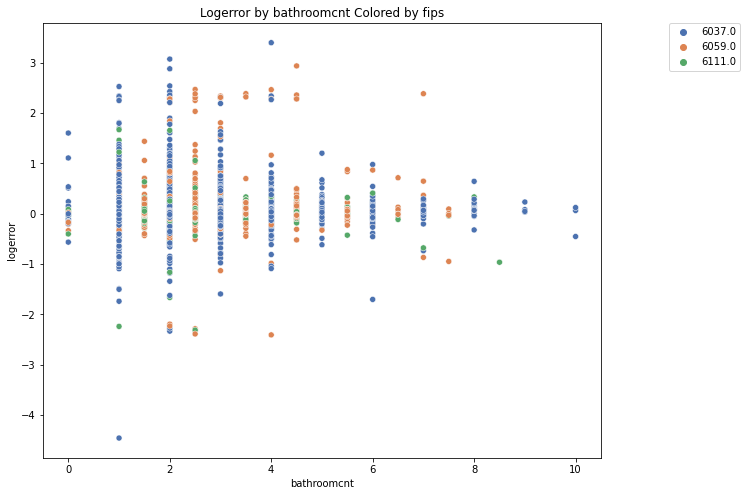

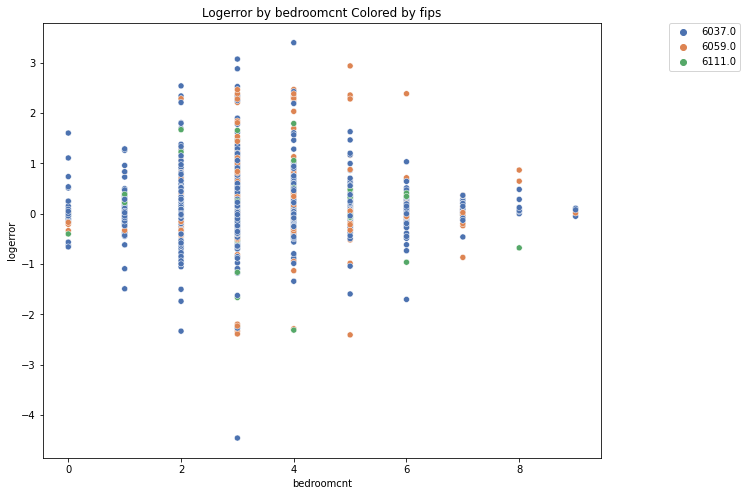

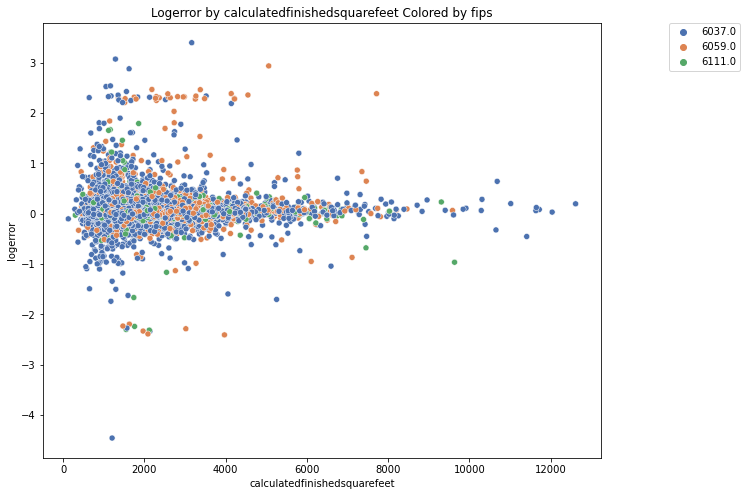

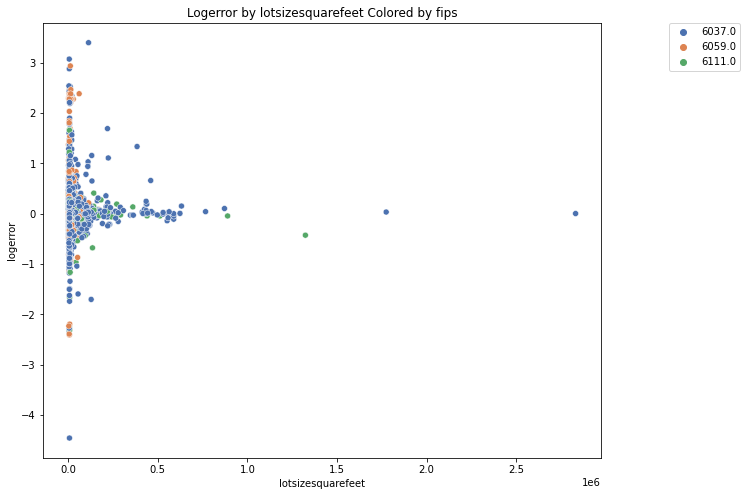

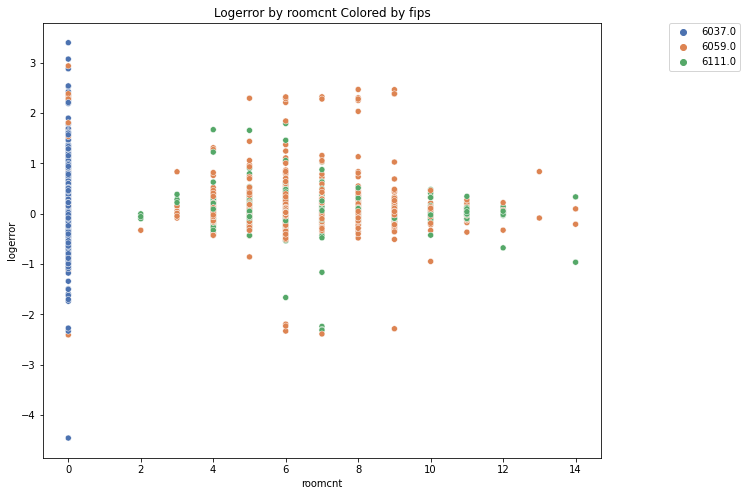

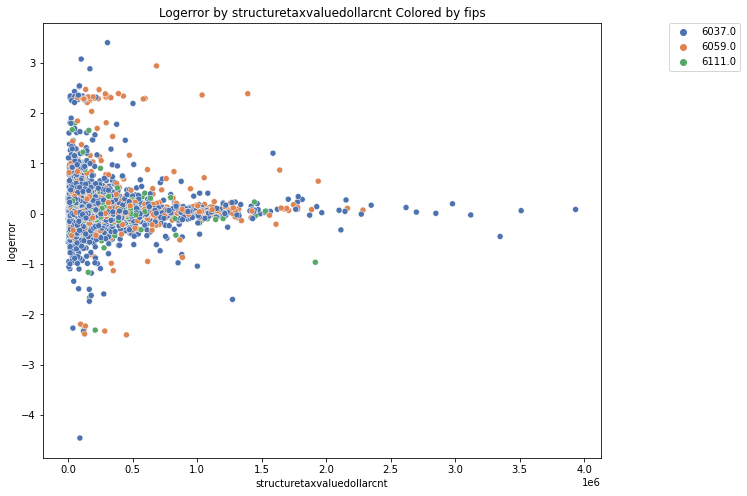

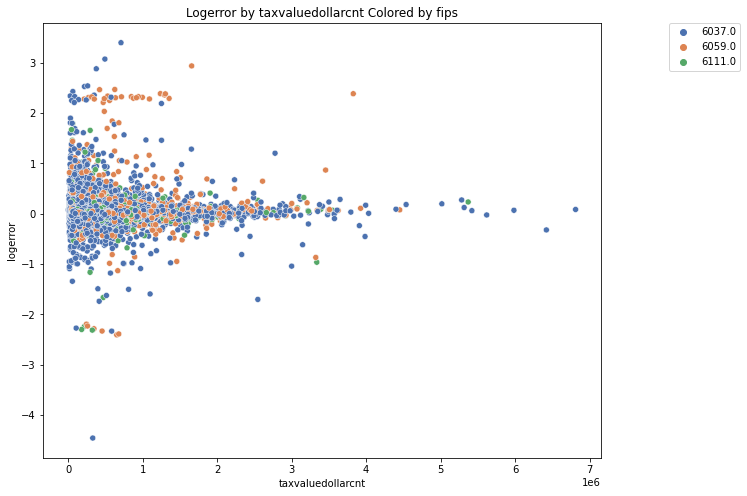

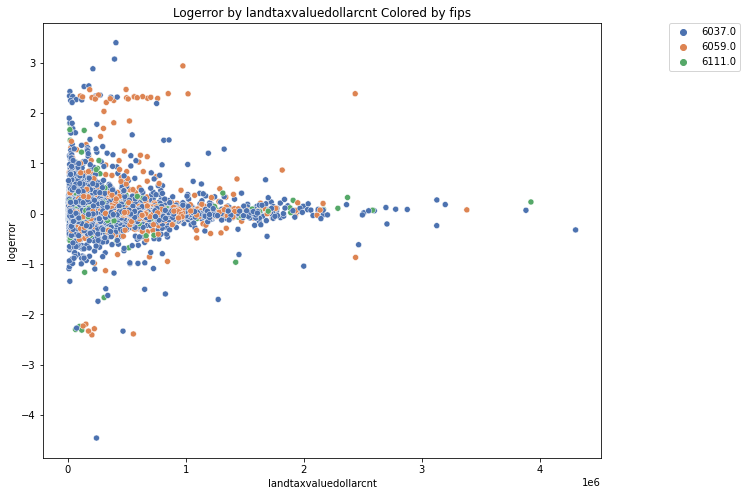

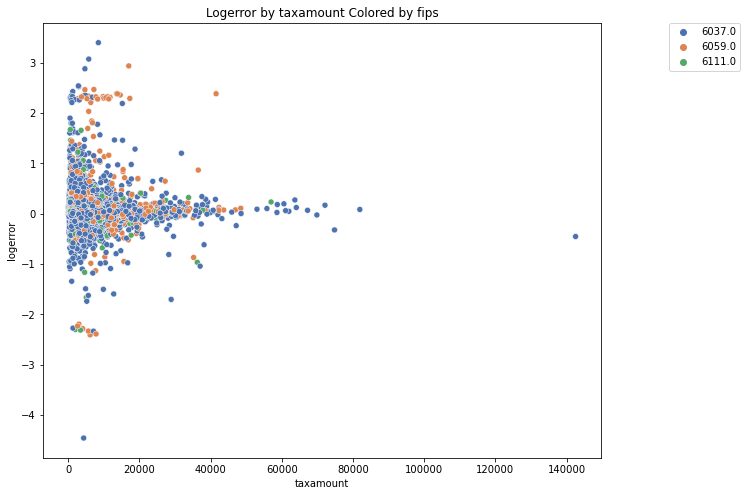

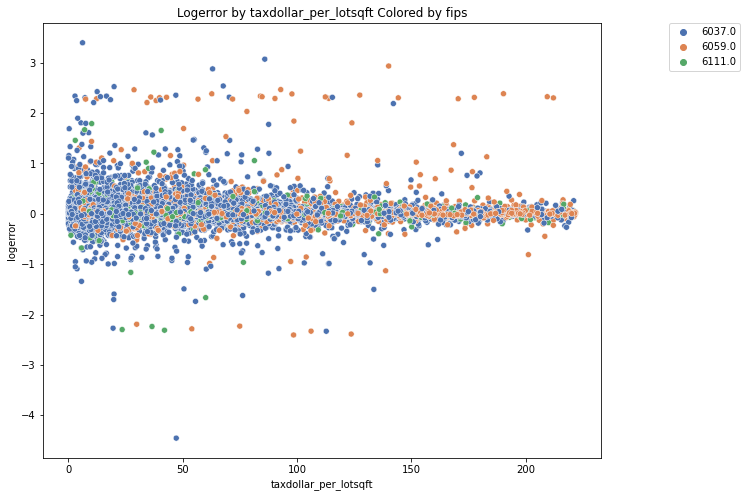

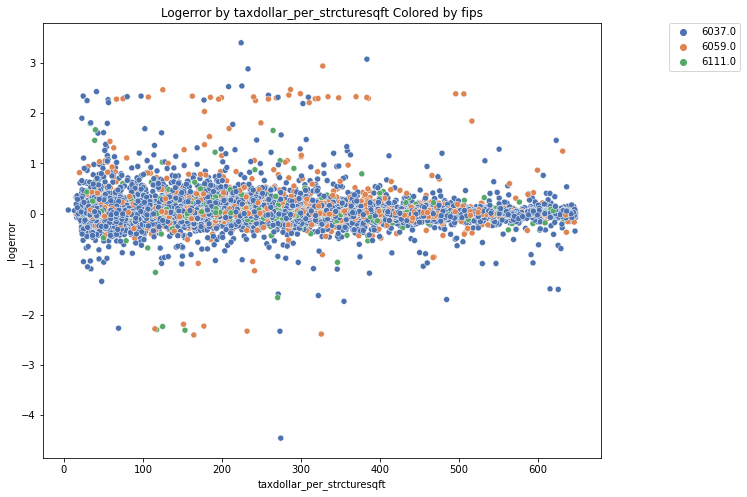

In [5]:
columns = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'roomcnt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'taxdollar_per_lotsqft', 'taxdollar_per_strcturesqft']

for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='fips', palette='deep')
    plt.title(f"Logerror by {col} Colored by fips")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)


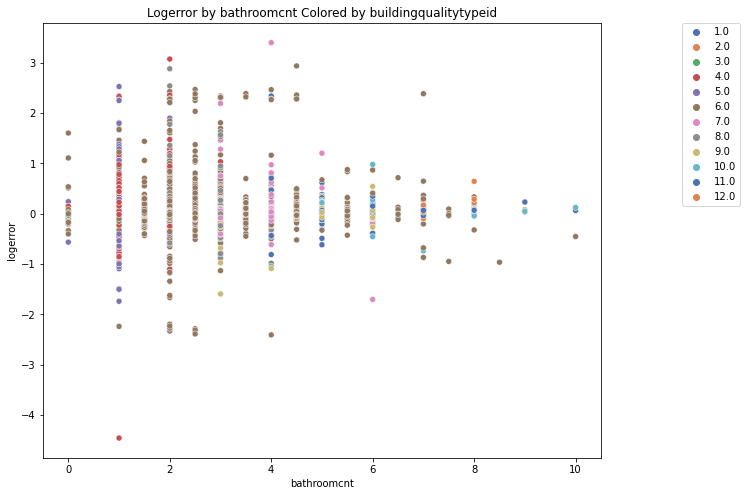

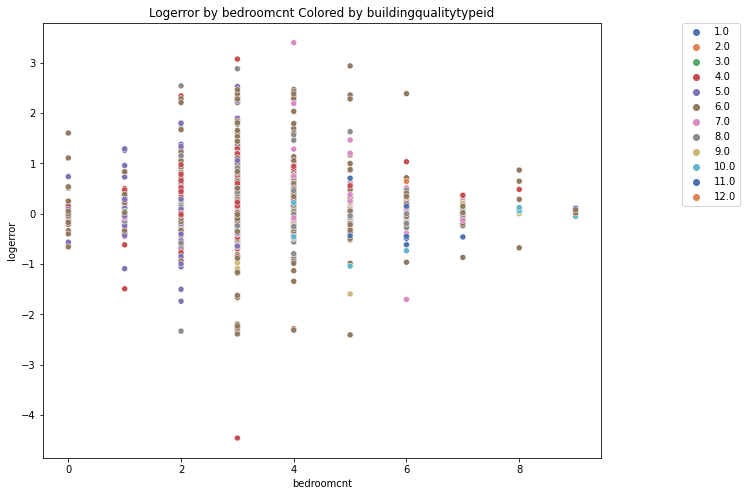

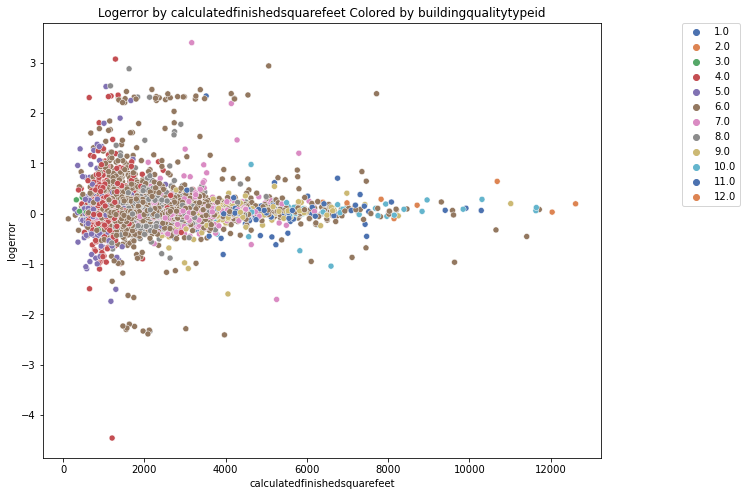

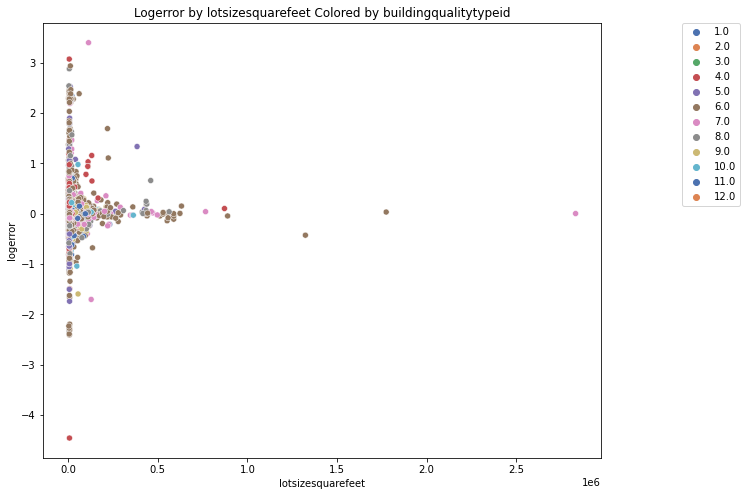

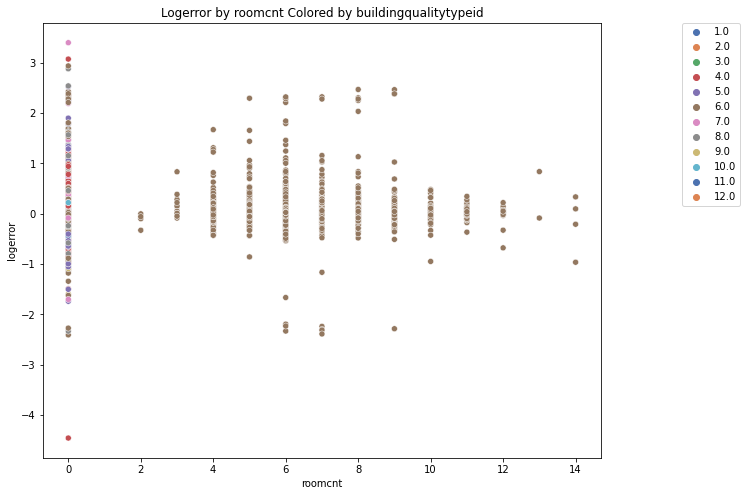

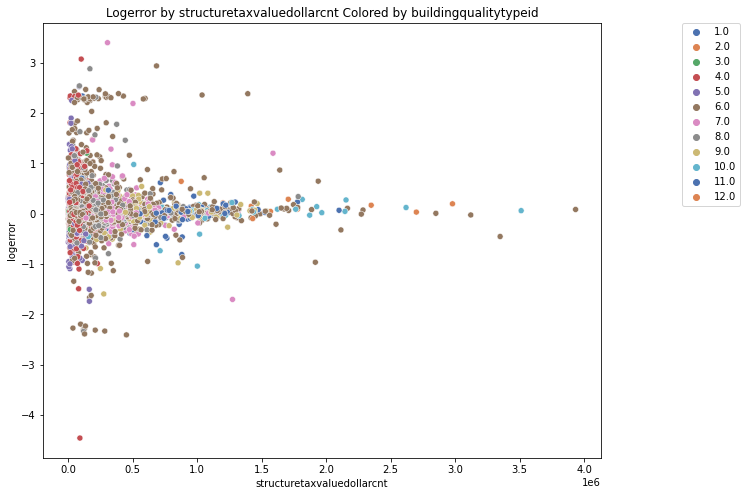

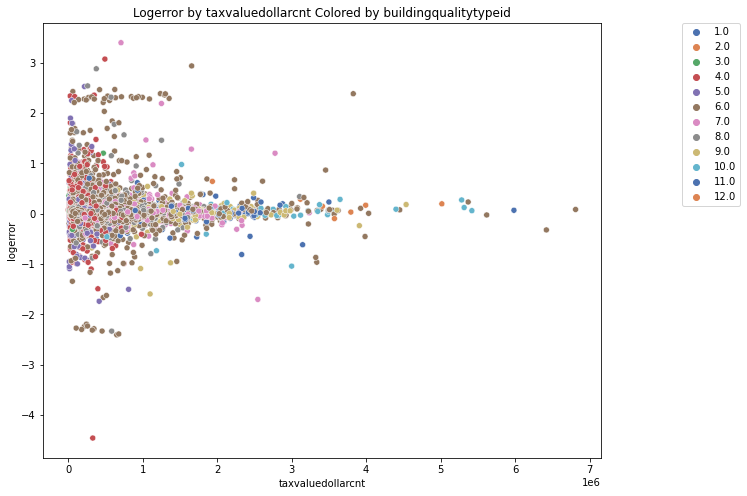

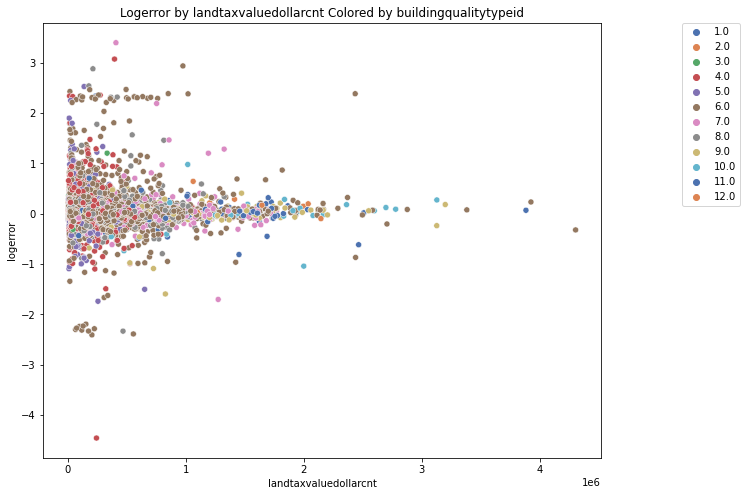

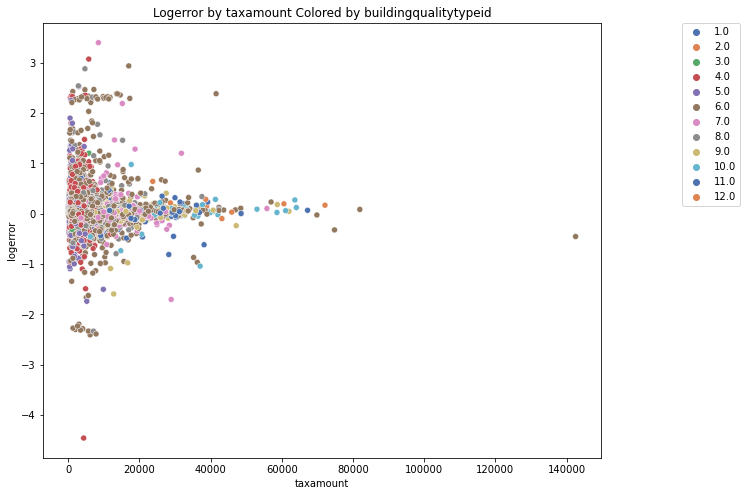

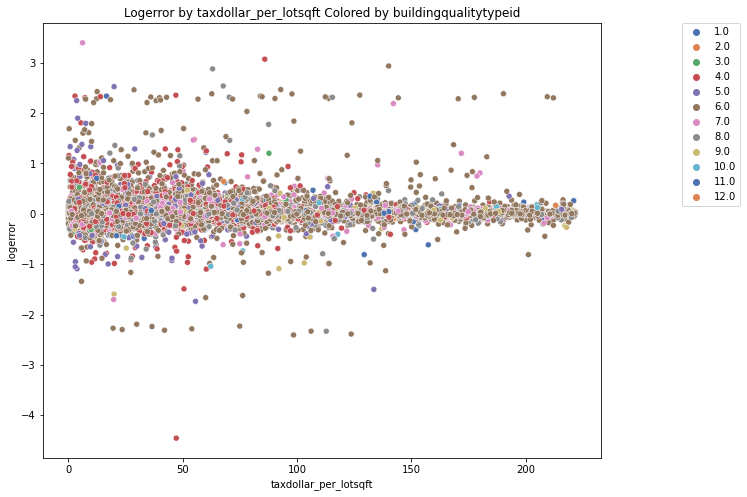

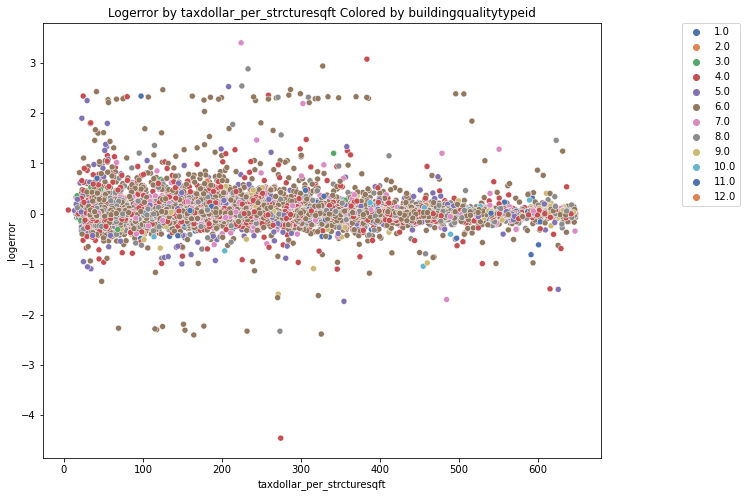

In [6]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='buildingqualitytypeid', palette='deep')
    plt.title(f"Logerror by {col} Colored by buildingqualitytypeid")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)


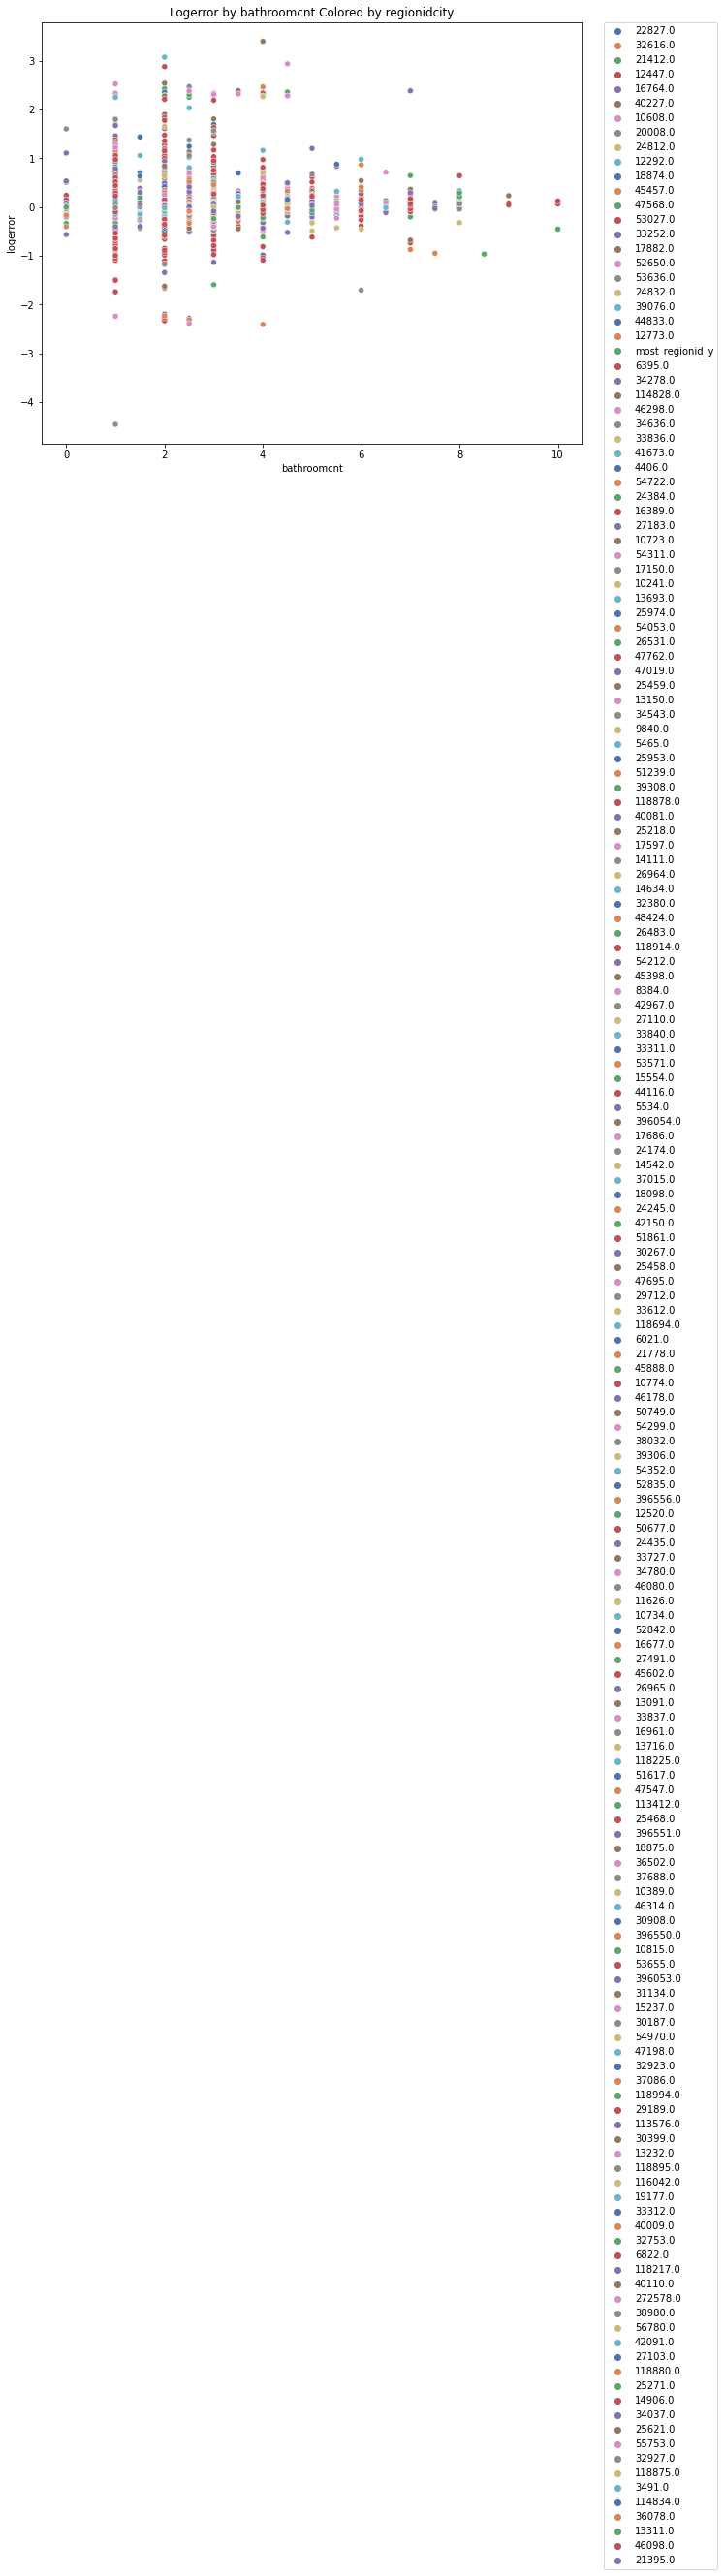

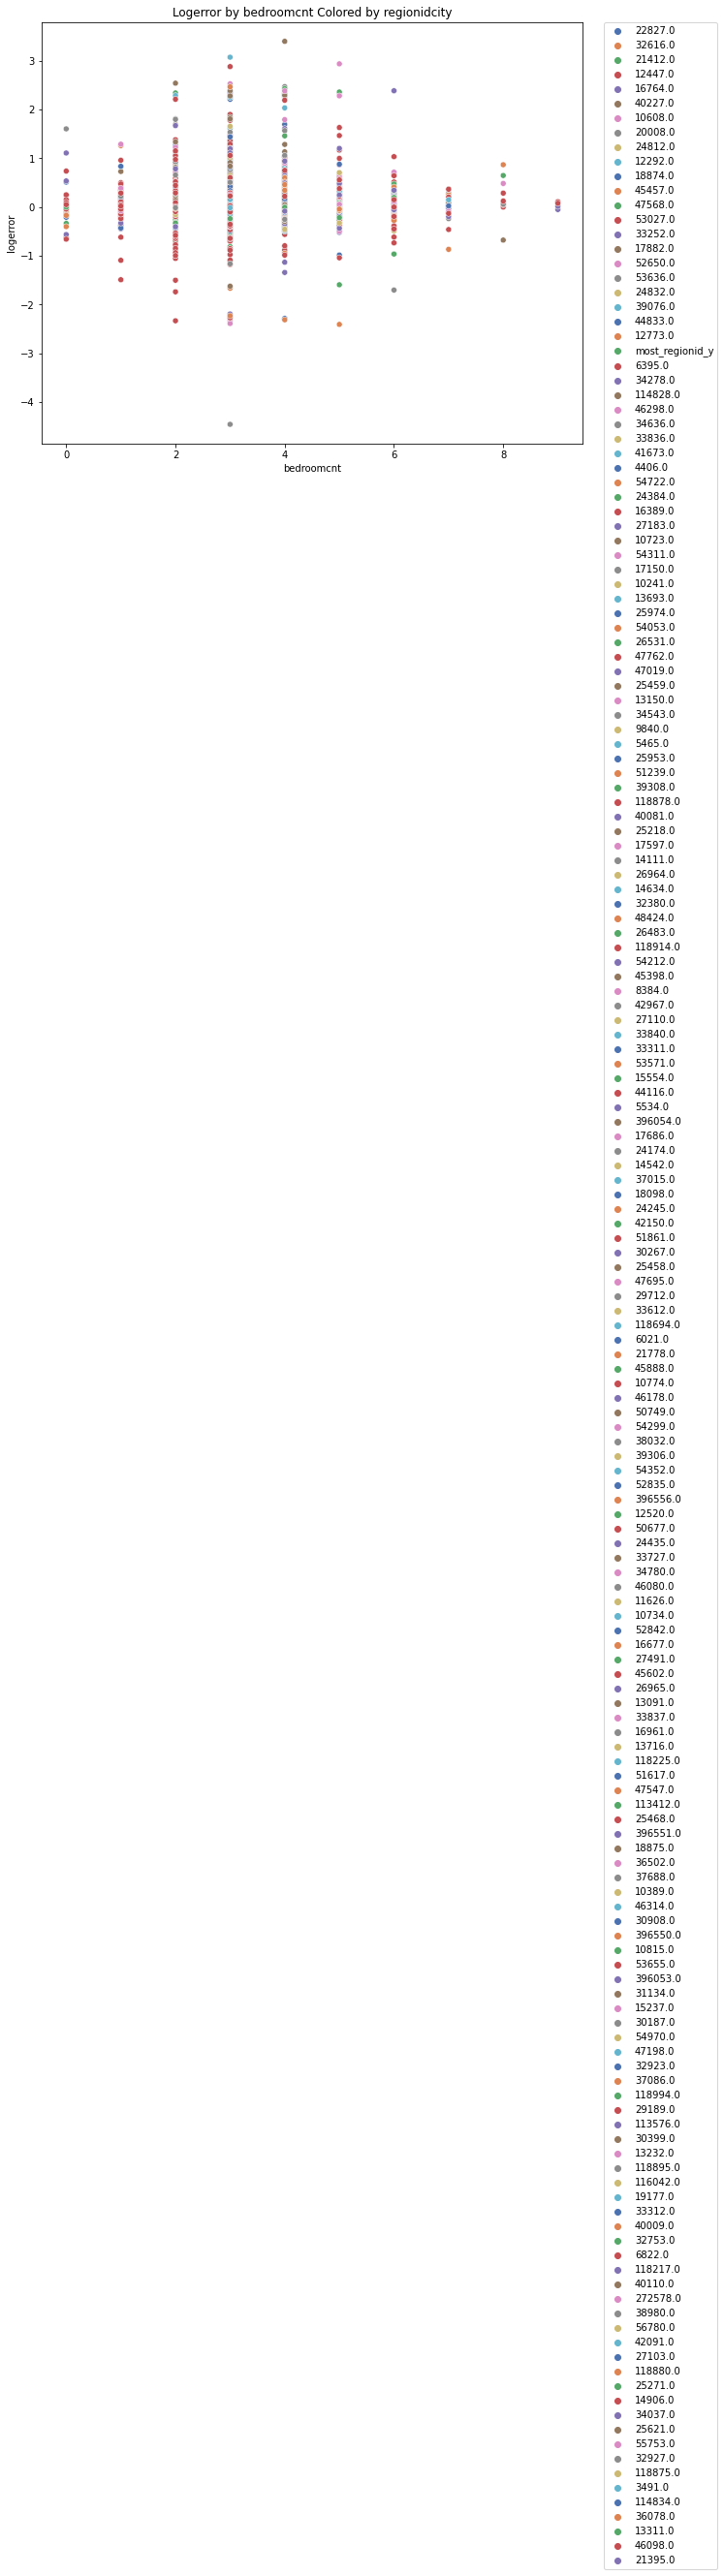

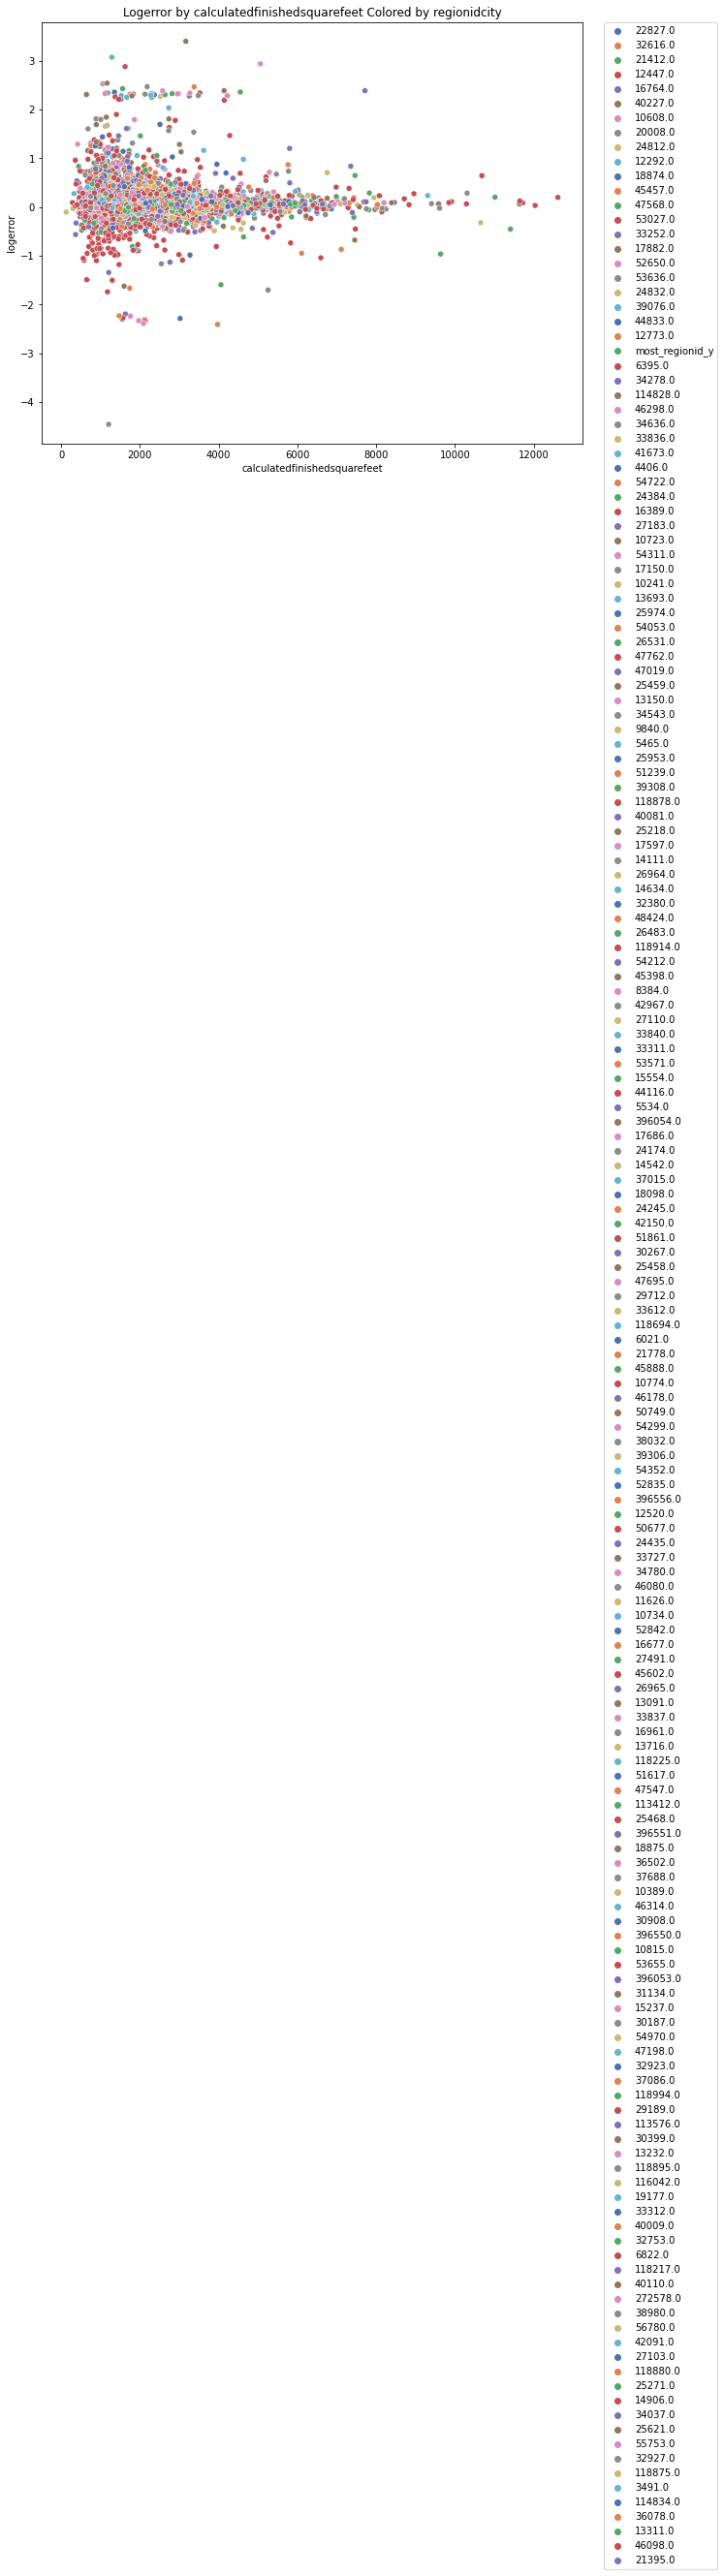

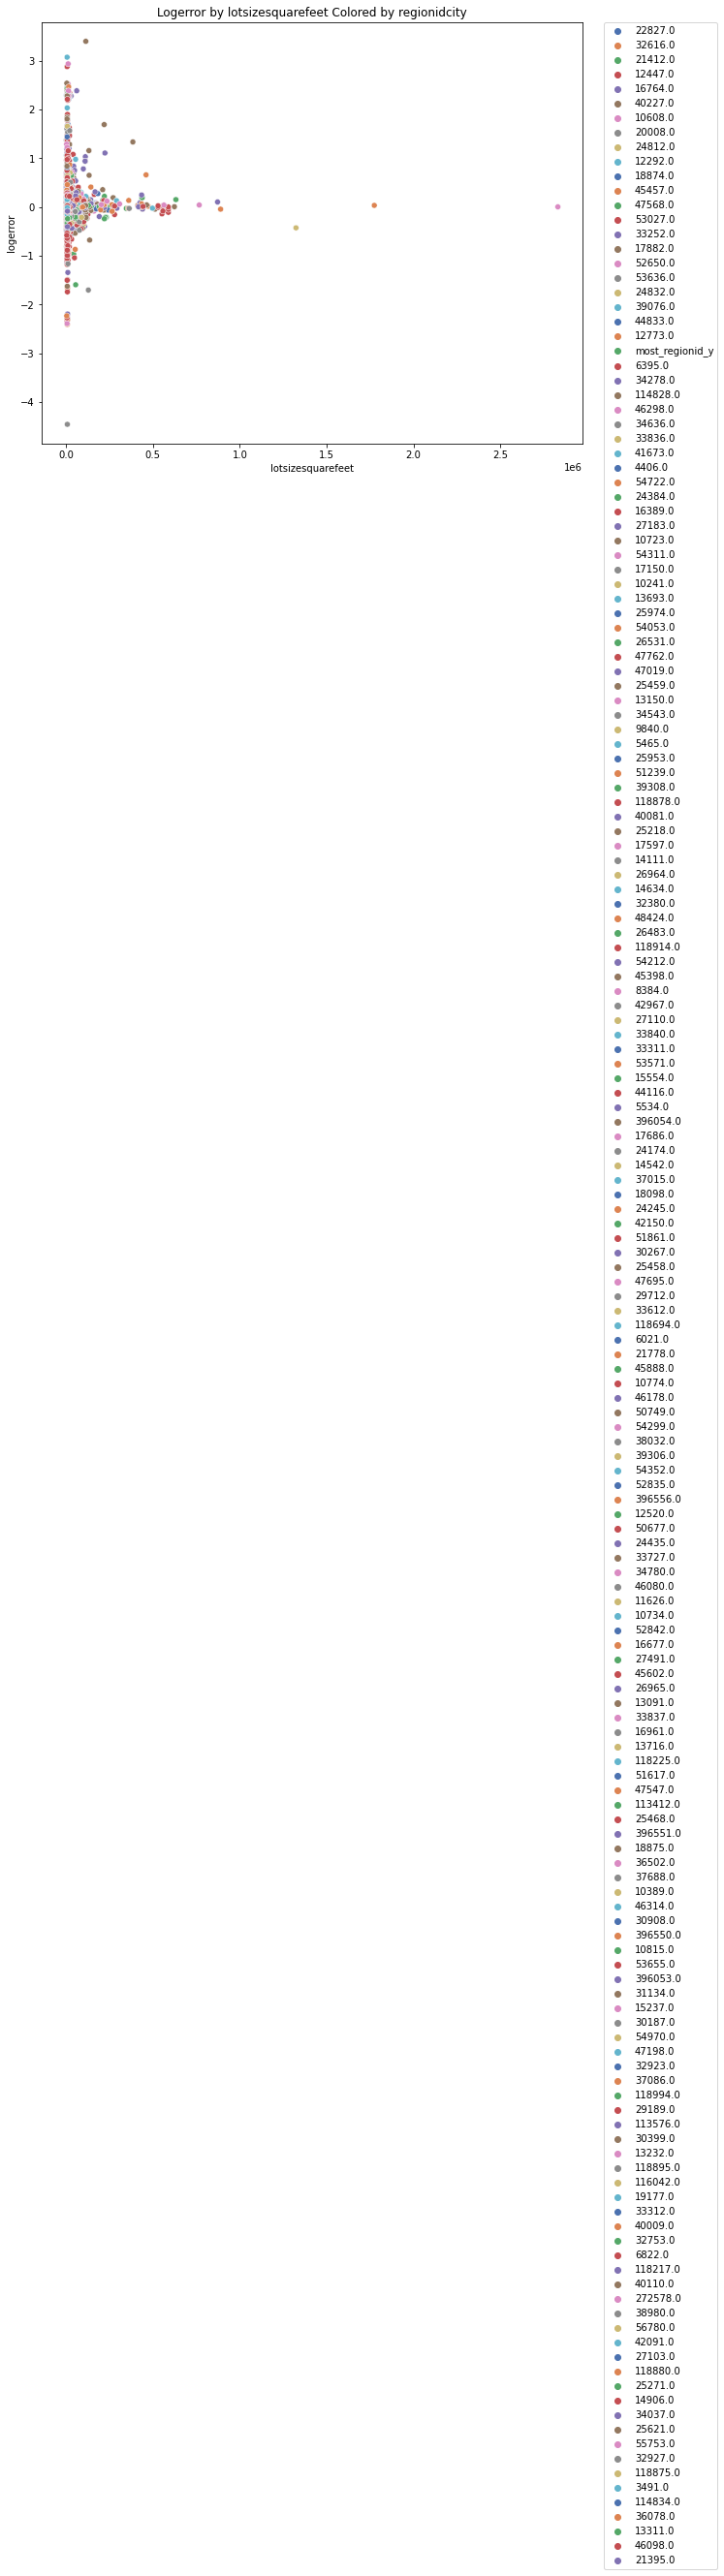

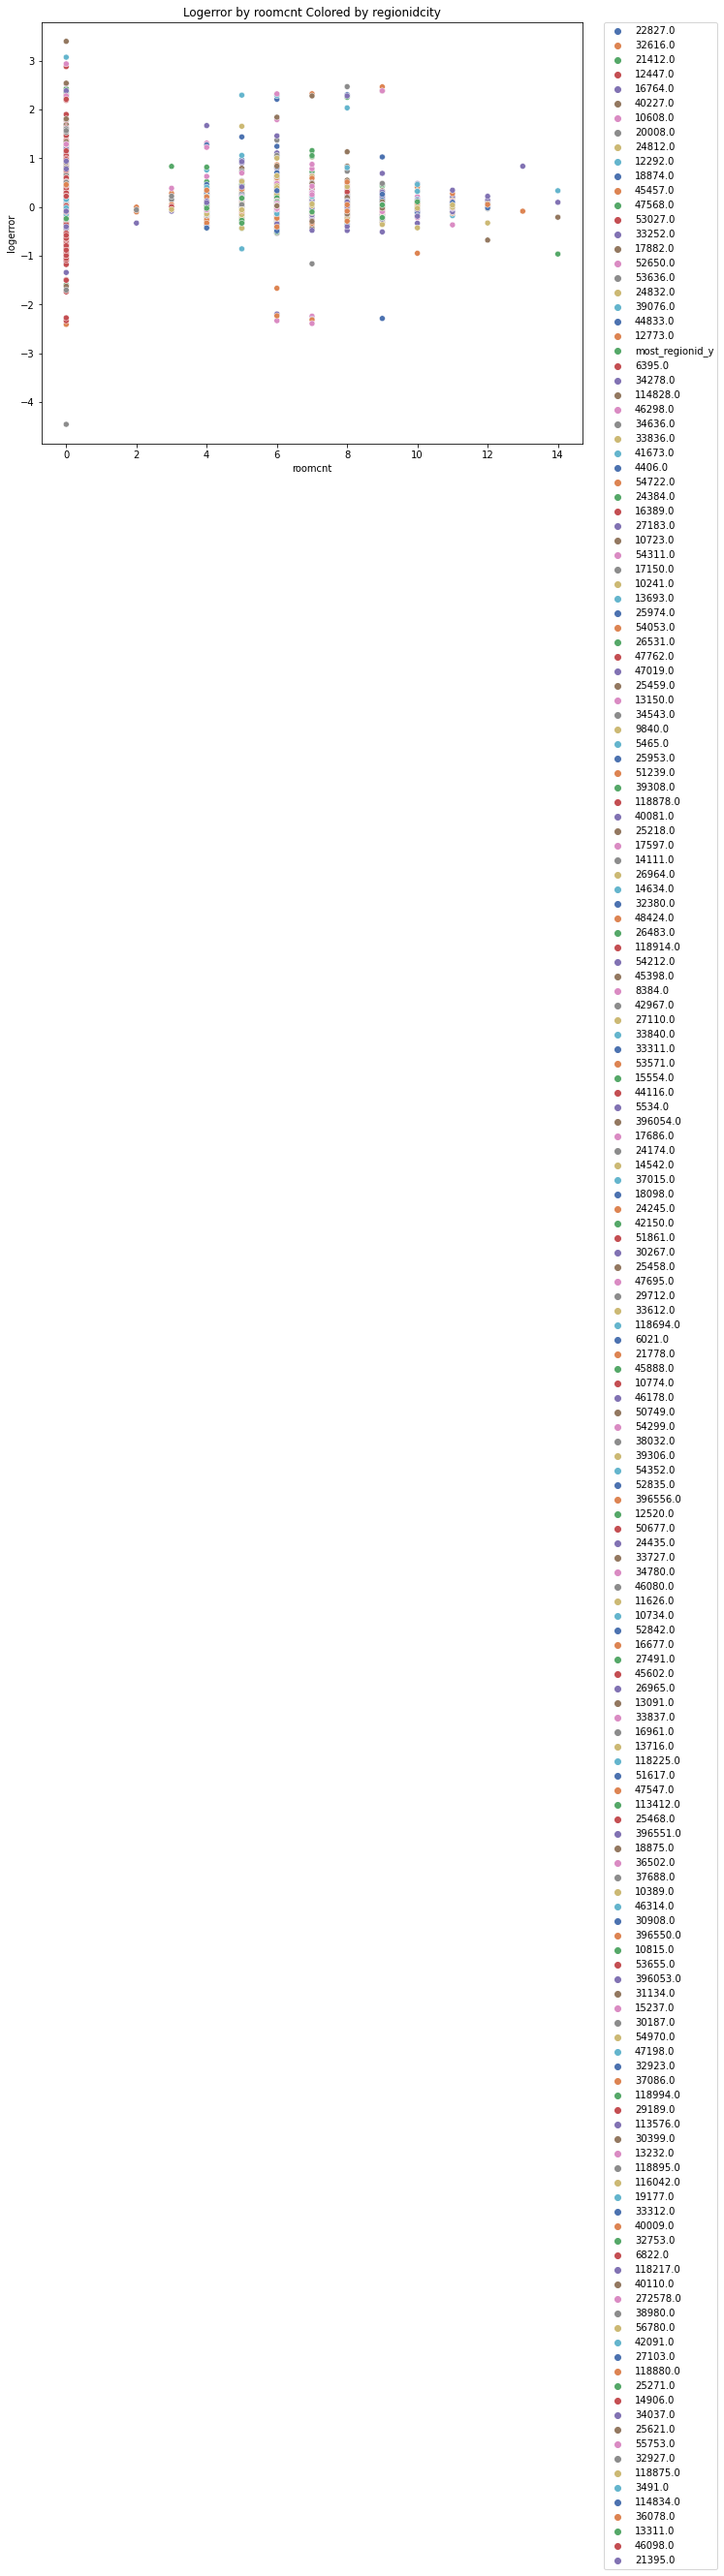

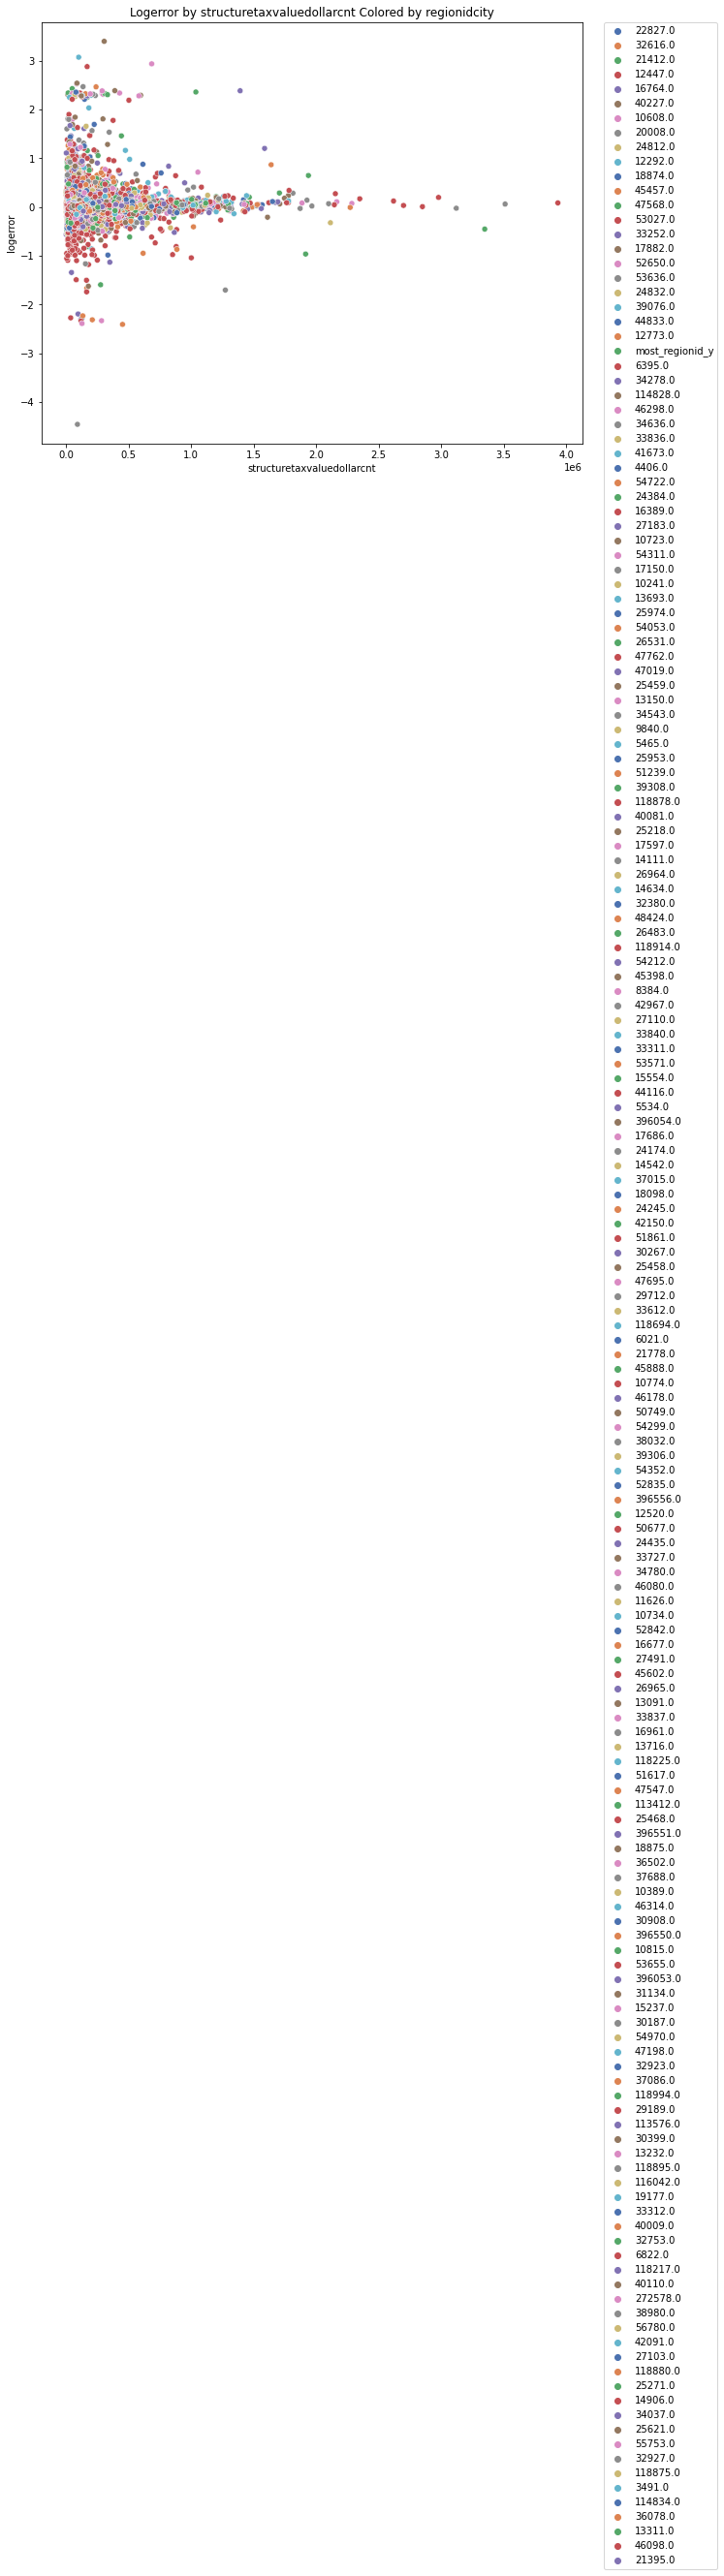

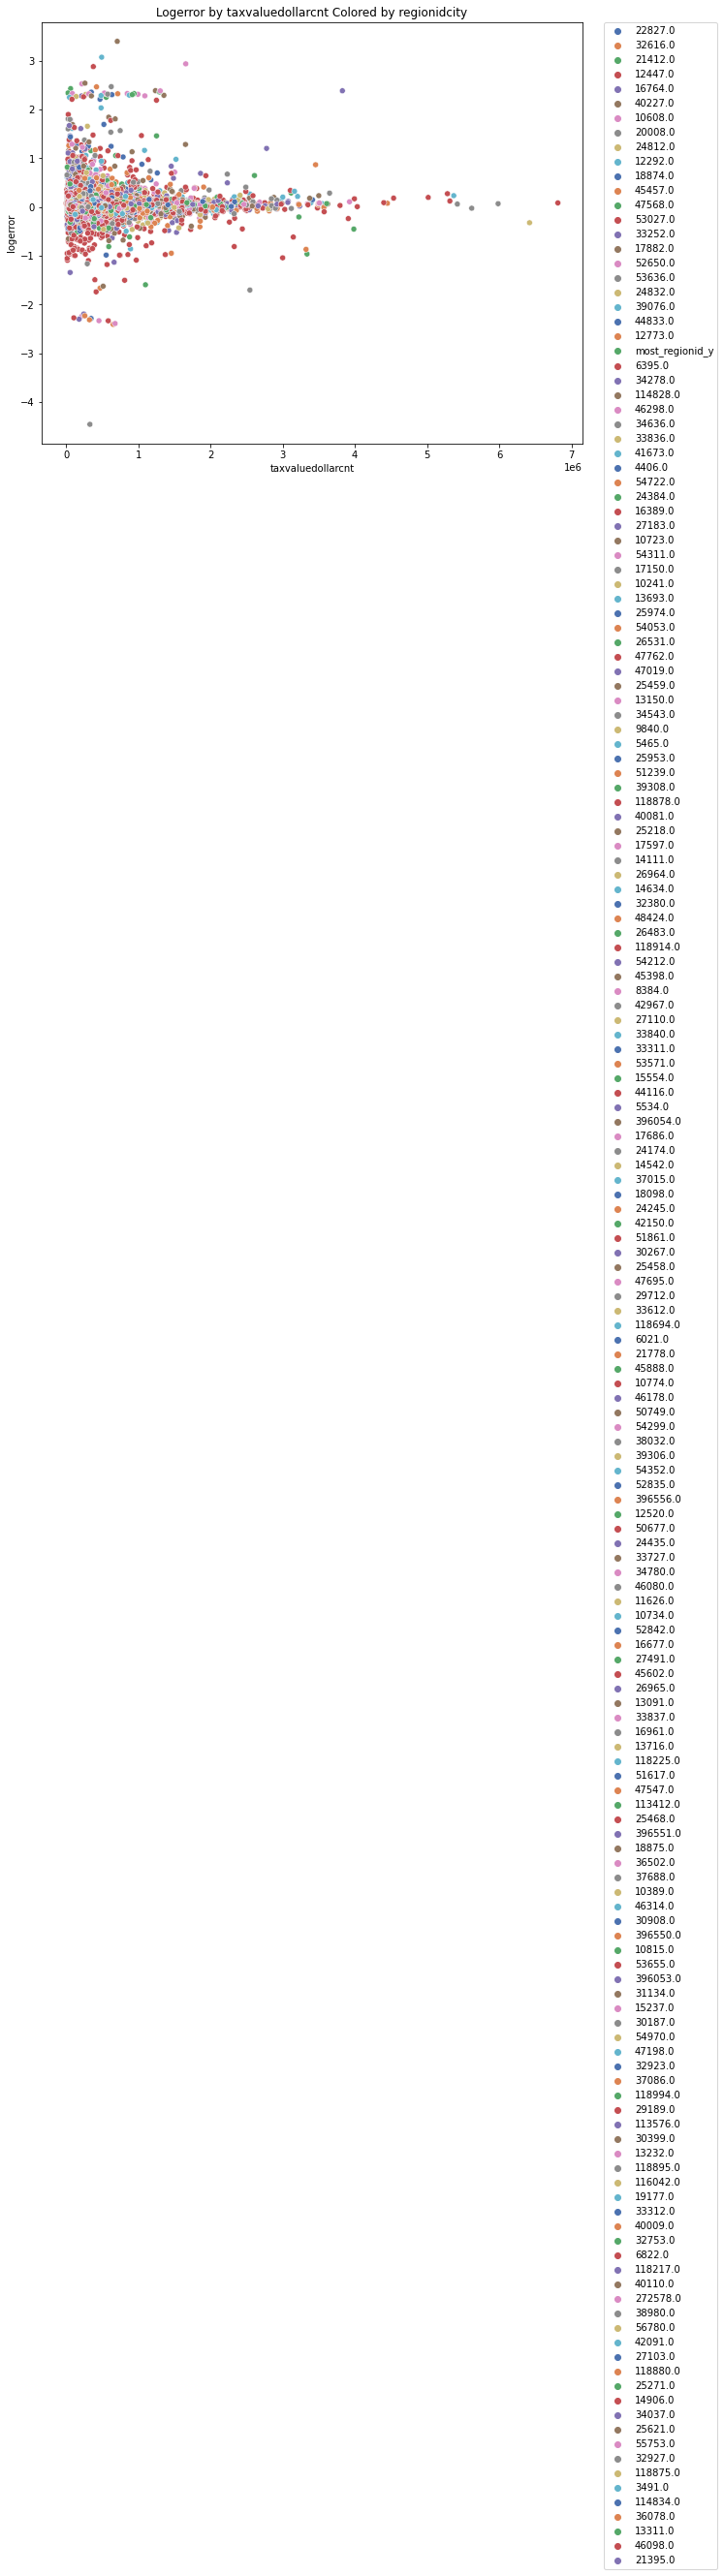

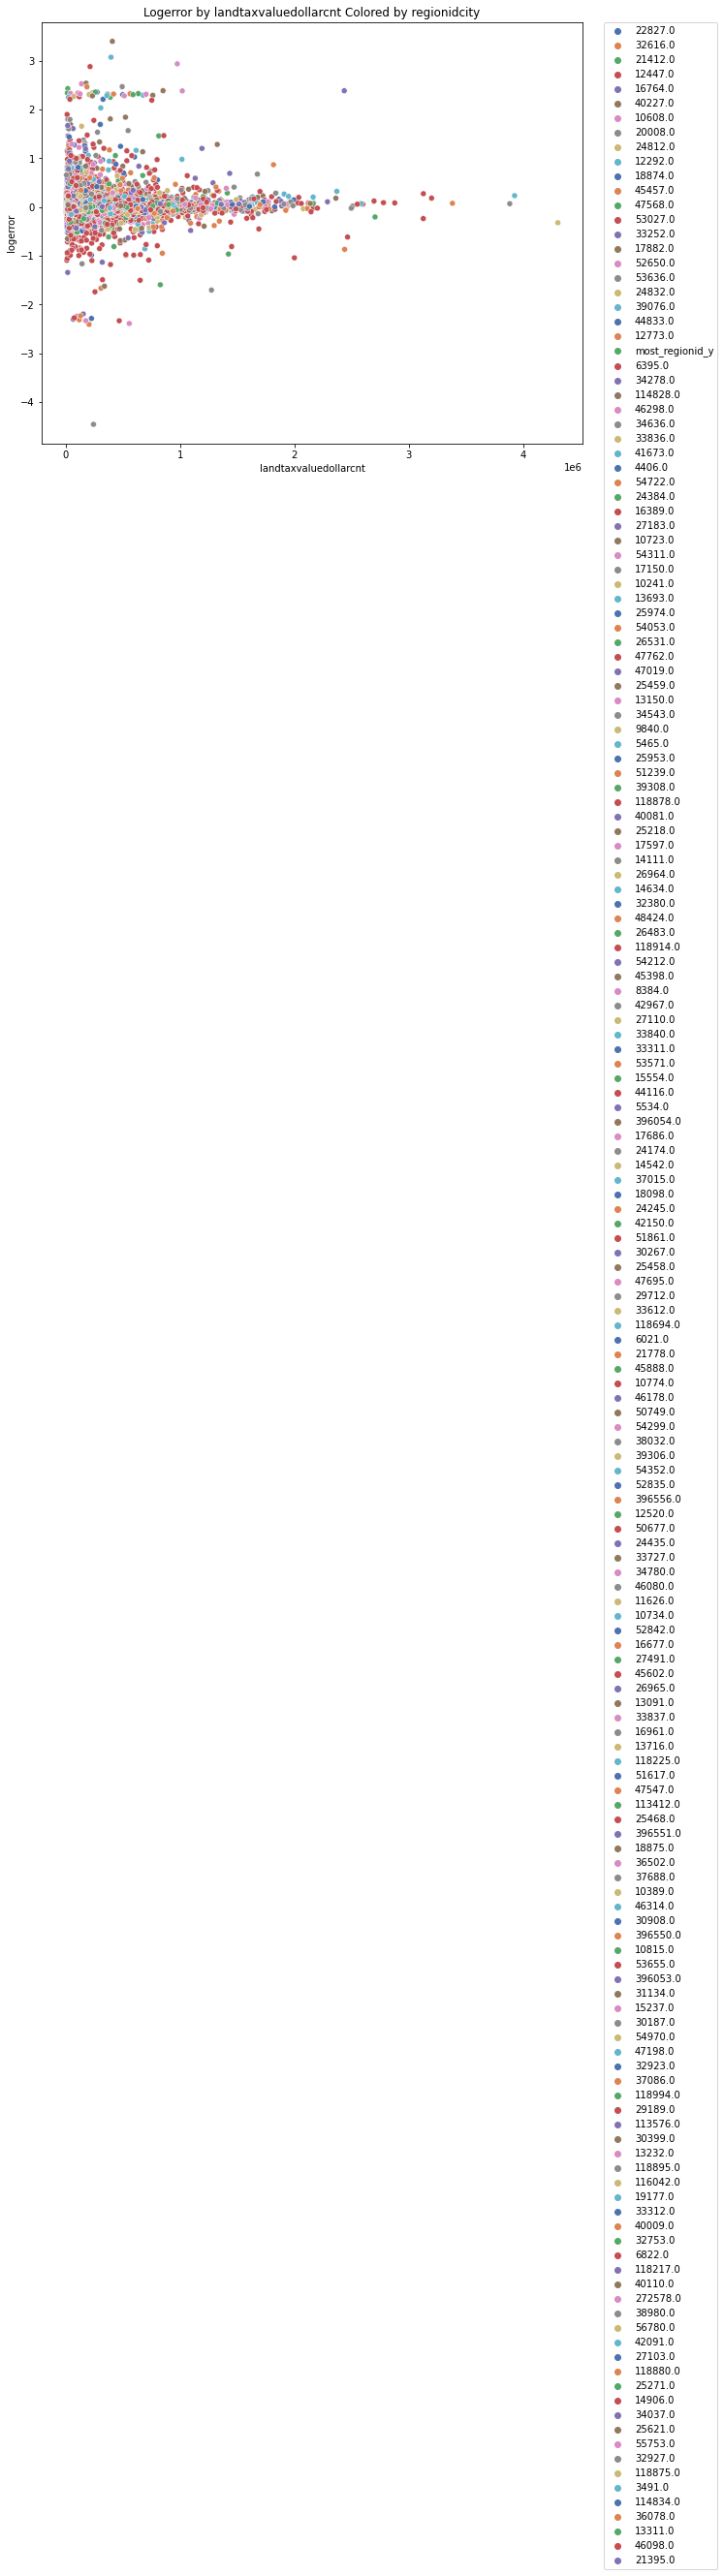

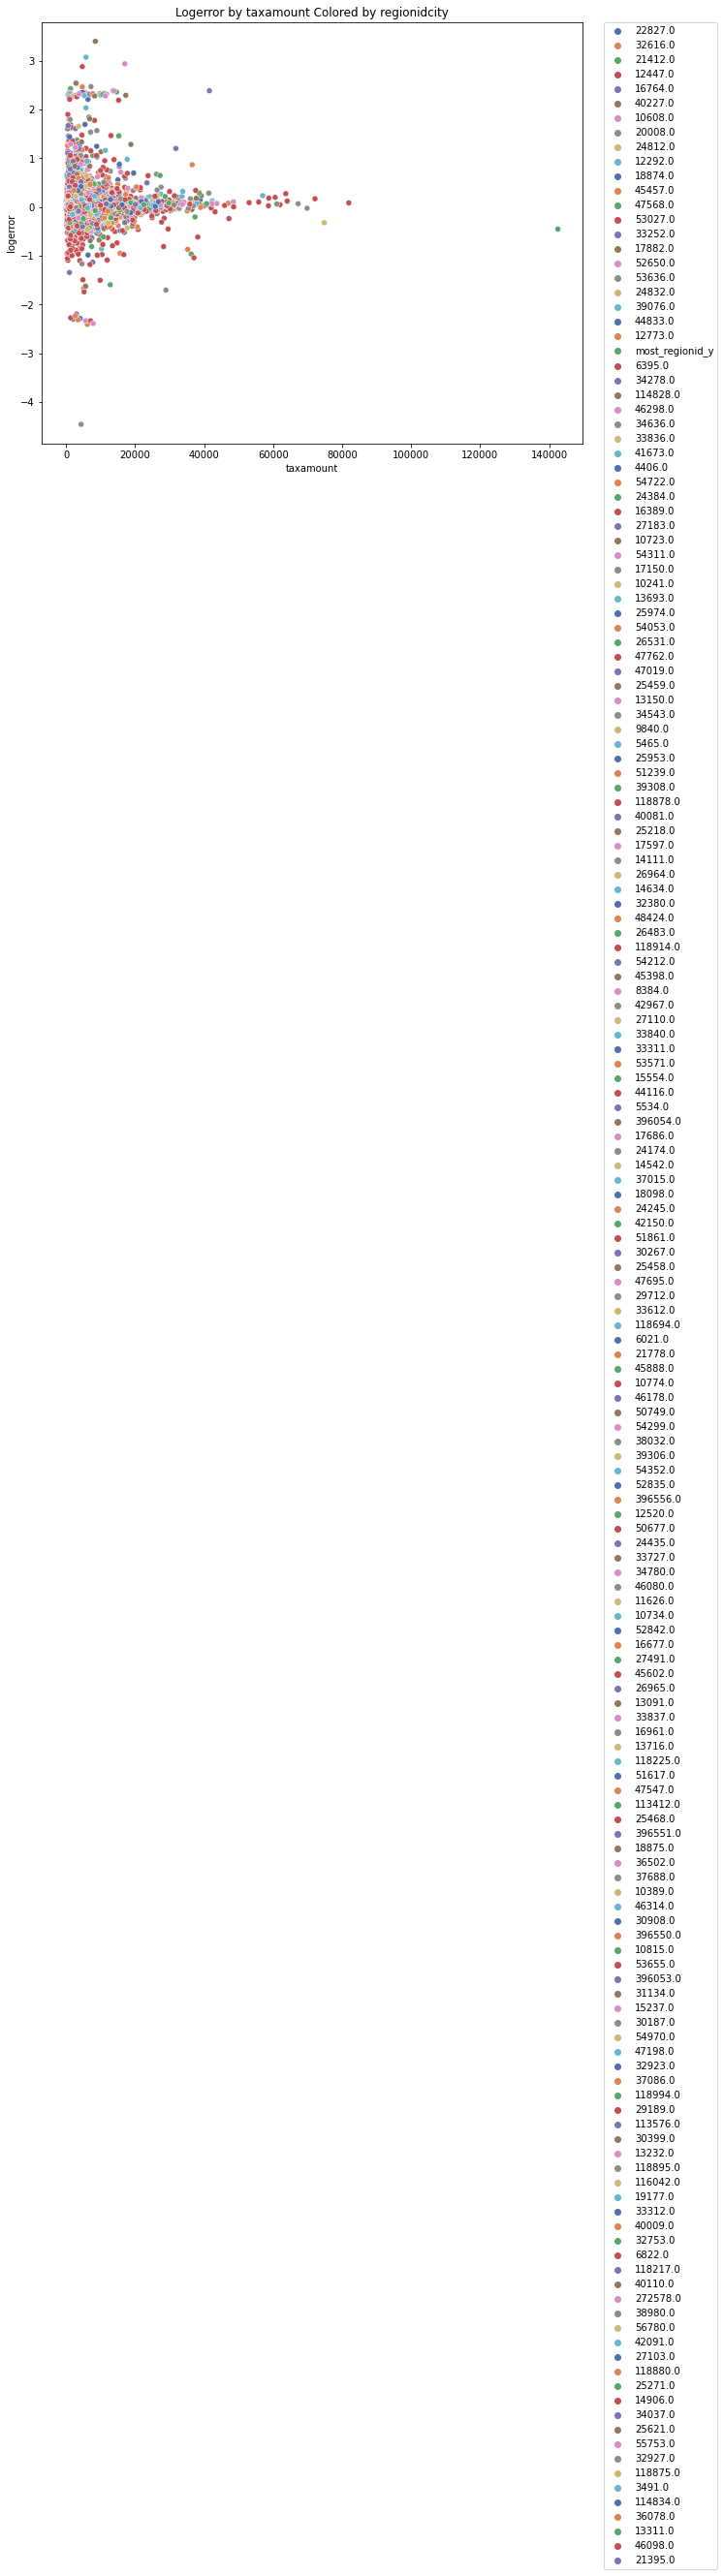

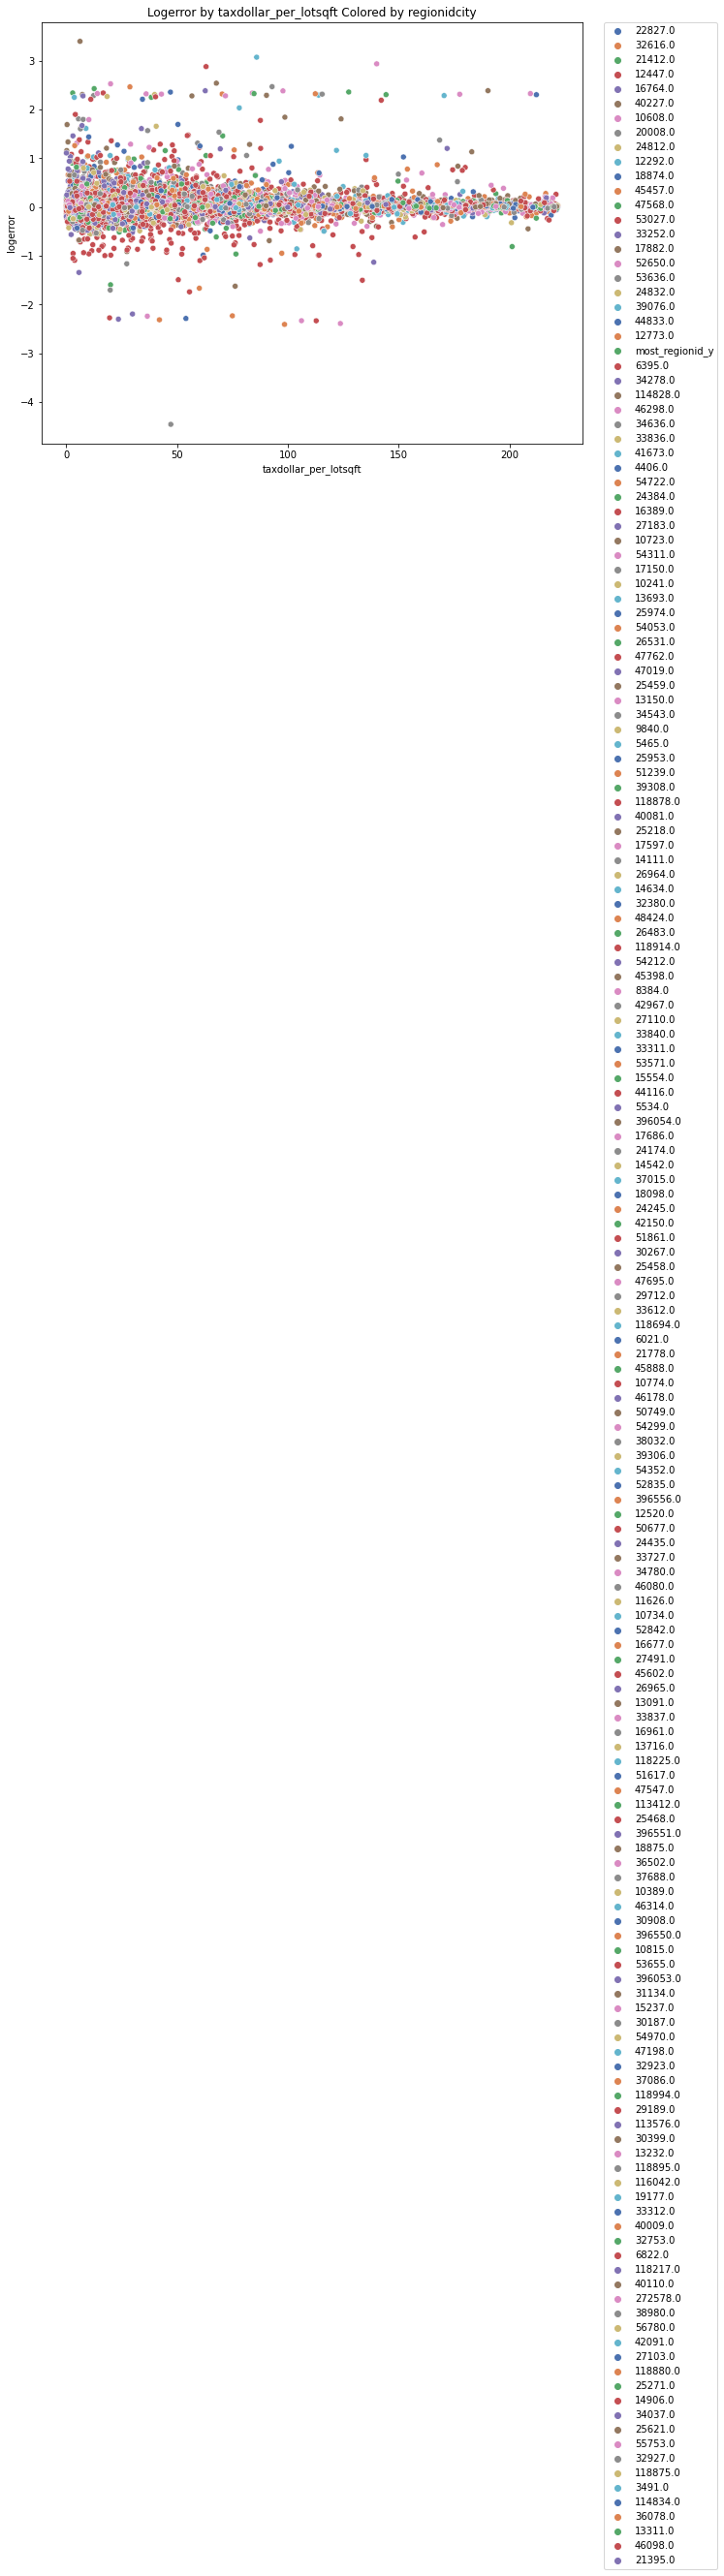

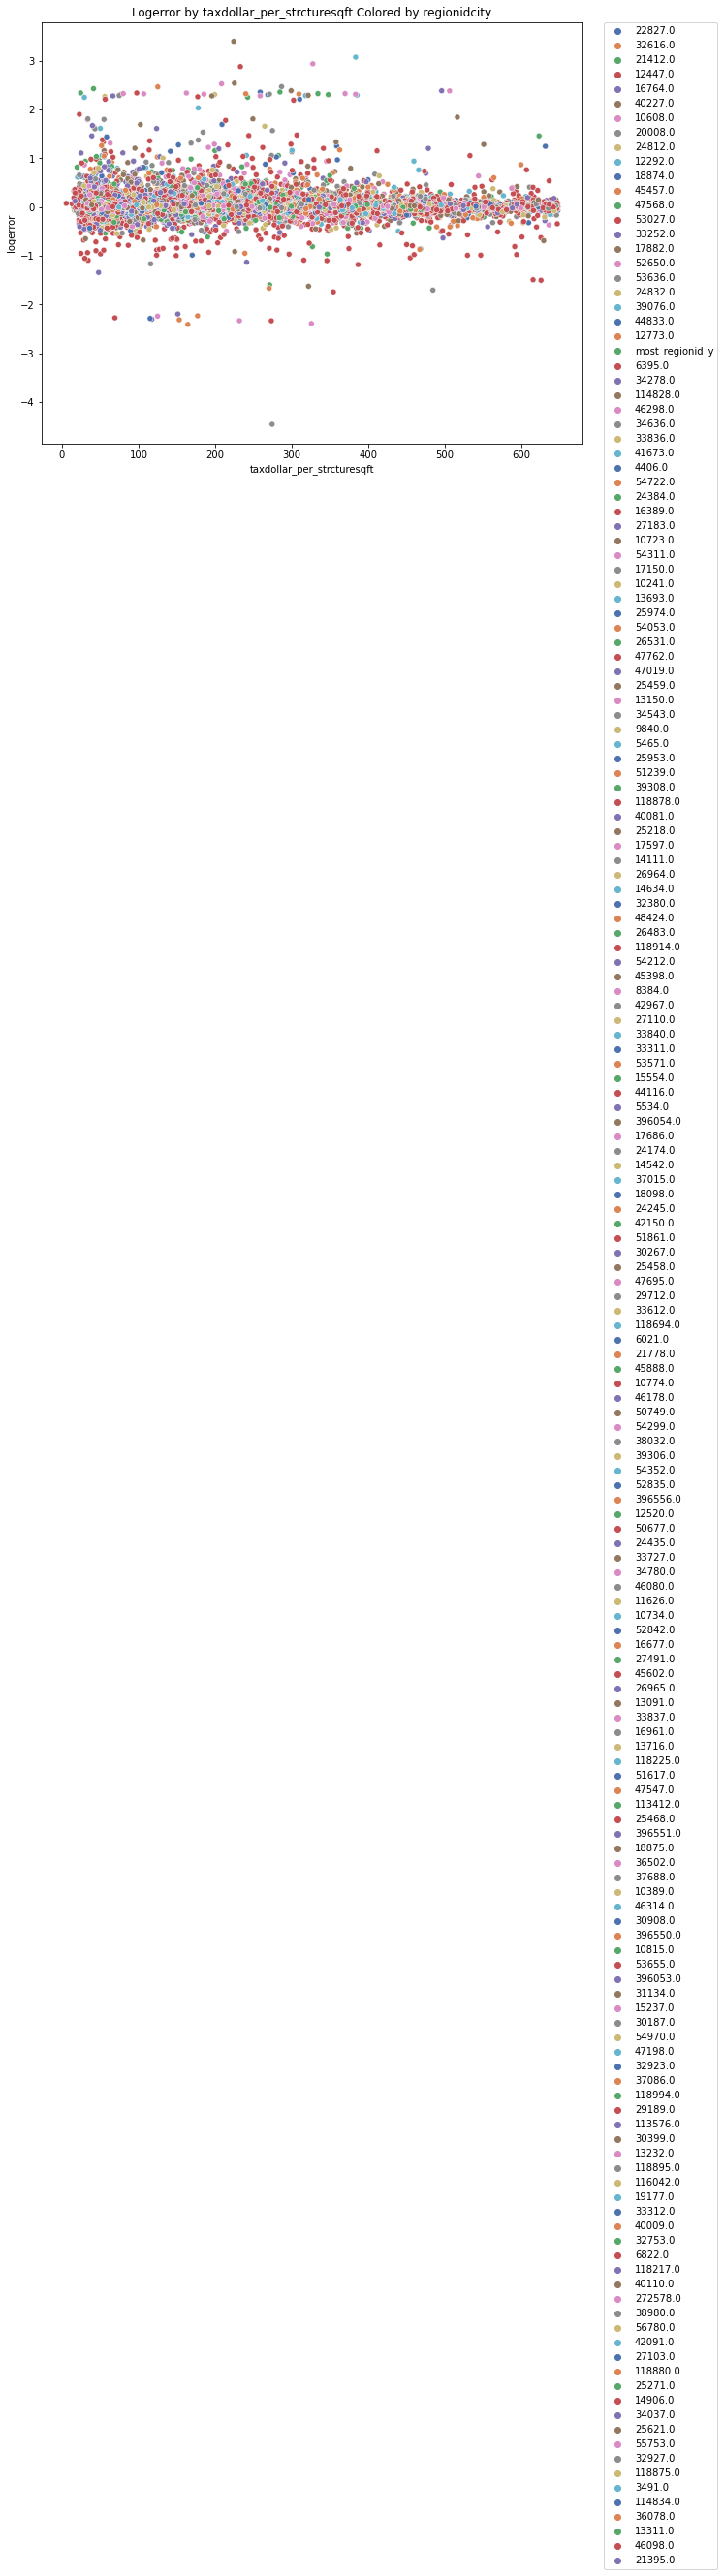

In [7]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='regionidcity', palette='deep')
    plt.title(f"Logerror by {col} Colored by regionidcity")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

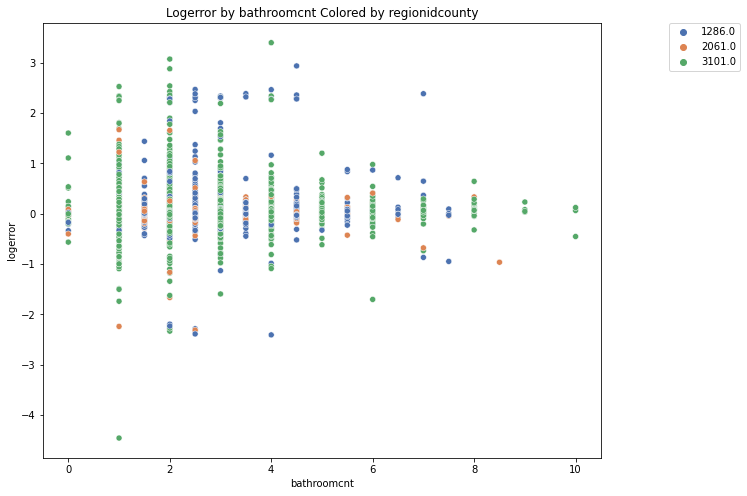

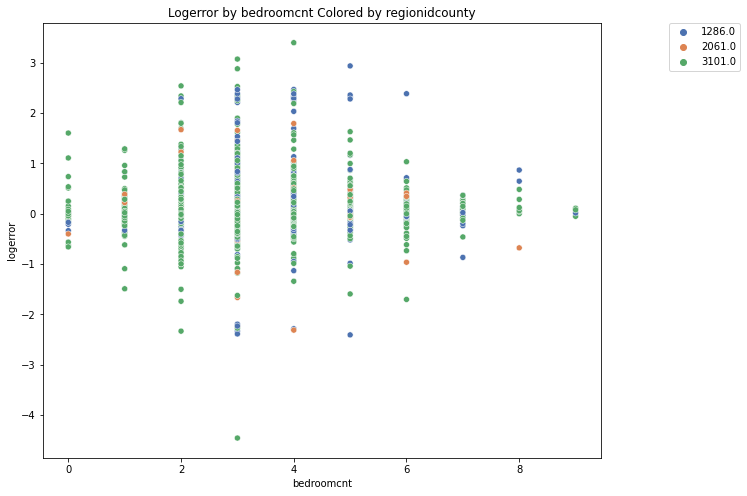

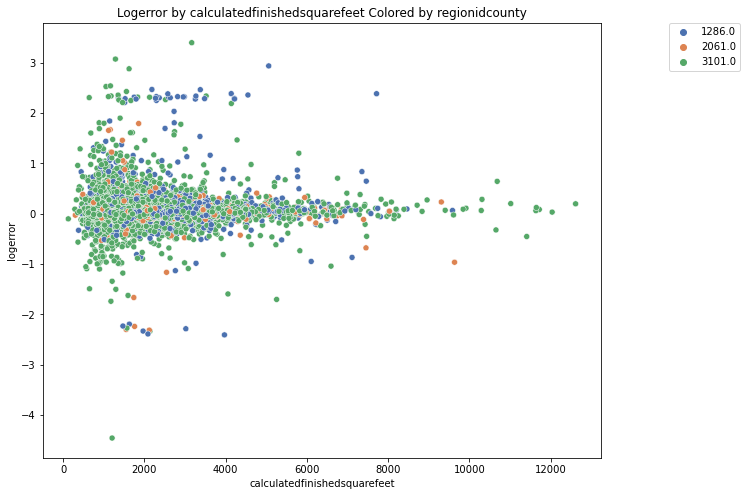

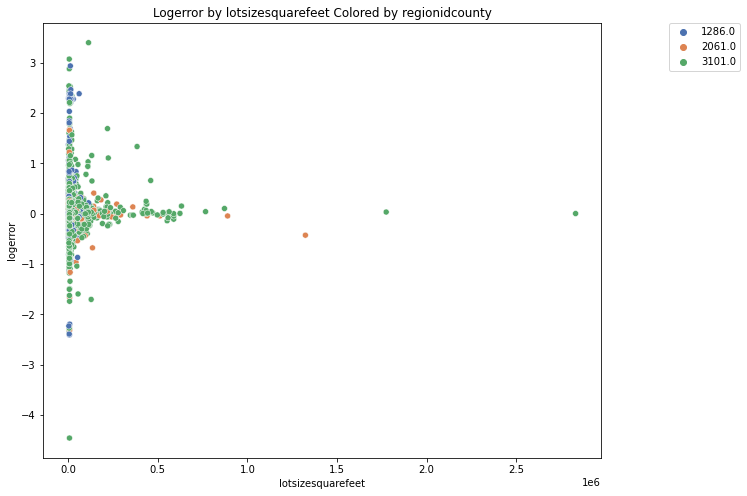

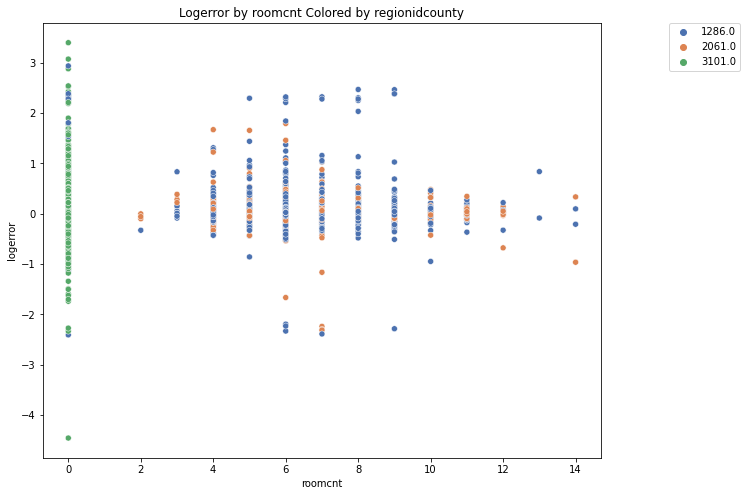

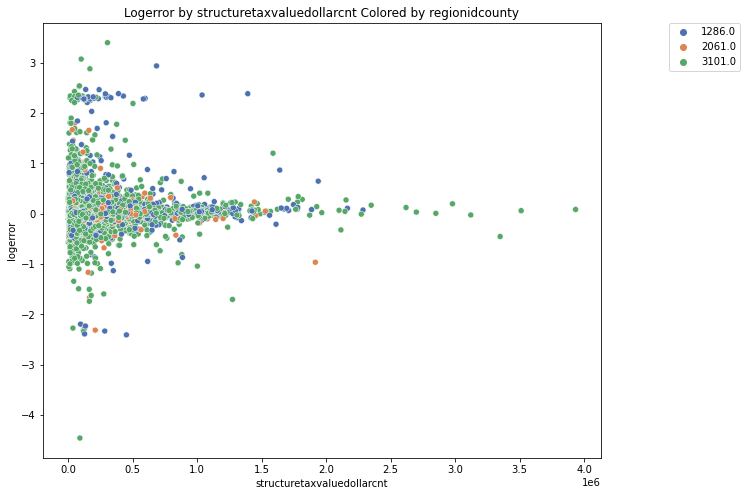

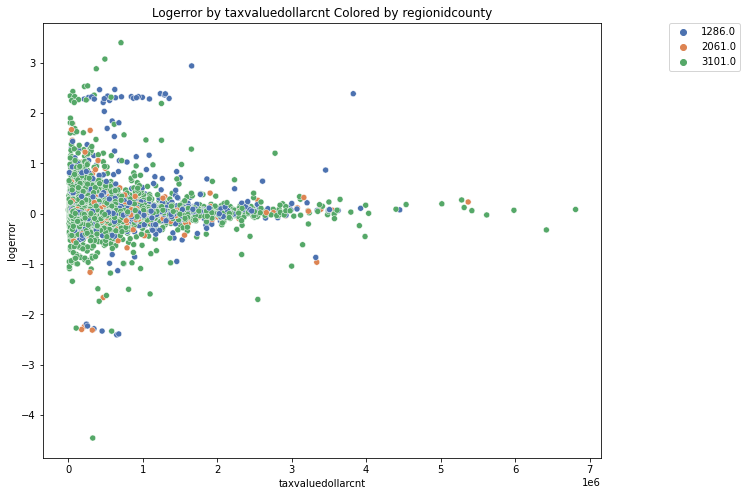

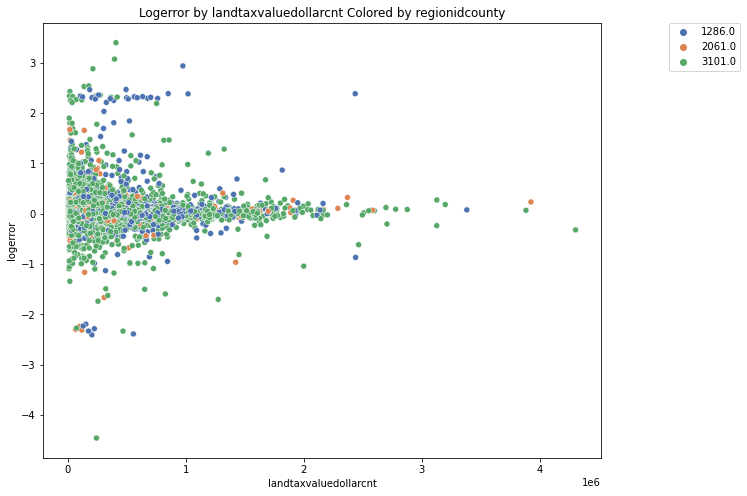

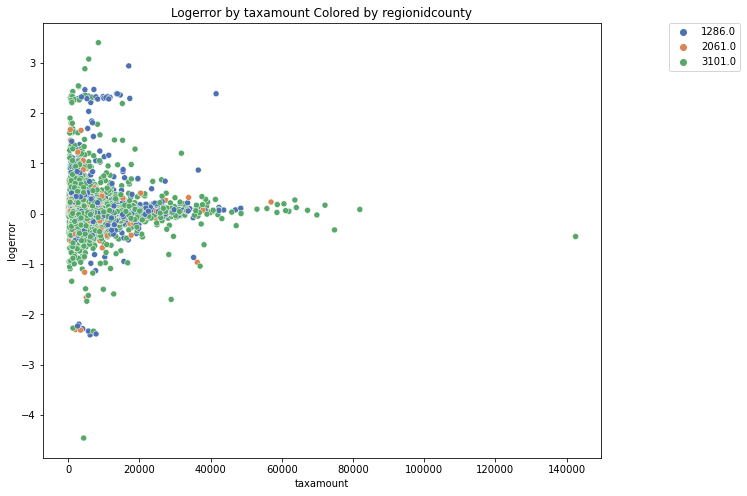

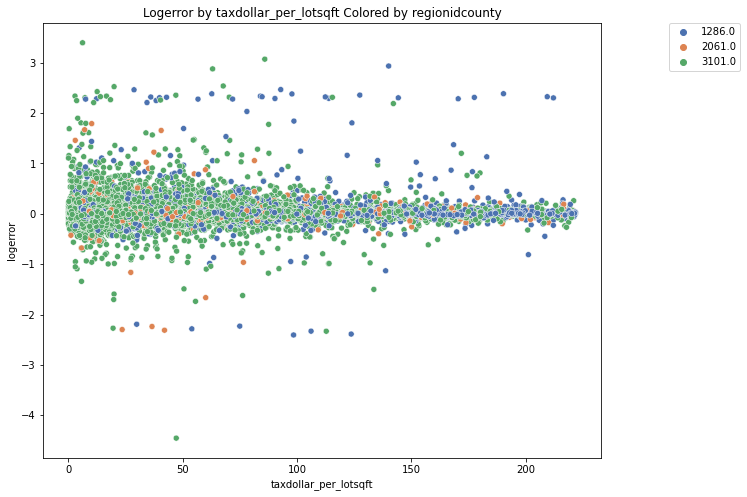

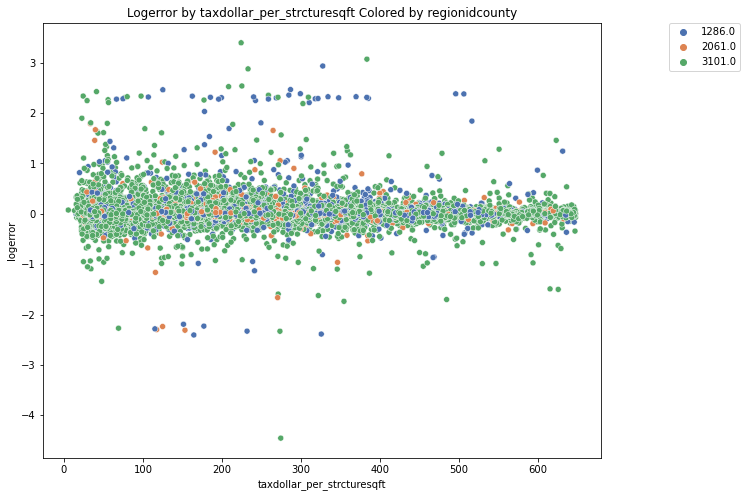

In [8]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='regionidcounty', palette='deep')
    plt.title(f"Logerror by {col} Colored by regionidcounty")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='regionidzip', palette='deep')
    plt.title(f"Logerror by {col} Colored by regionidzip")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='yearbuilt', palette='deep')
    plt.title(f"Logerror by {col} Colored by yearbuilt")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='heatingorsystemdesc', palette='deep')
    plt.title(f"Logerror by {col} Colored by heatingorsystemdesc")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='propertylandusedesc', palette='deep')
    plt.title(f"Logerror by {col} Colored by propertylandusedesc")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='has_pool', palette='deep')
    plt.title(f"Logerror by {col} Colored by has_pool")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='has_basement', palette='deep')
    plt.title(f"Logerror by {col} Colored by has_basement")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='more_than_two_bath', palette='deep')
    plt.title(f"Logerror by {col} Colored by more_than_two_bath")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='hashottuborspa', palette='deep')
    plt.title(f"Logerror by {col} Colored by hashottuborspa")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='logerror', hue='propertycountylandusecode', palette='deep')
    plt.title(f"Logerror by {col} Colored by propertycountylandusecode")
    plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

## Clustering

## Modeling

# Results & Conclusion